# EDA on mini NYC yellow taxi data (combined with property data)

## Comments:

Taxi data was downloaded from New York Taxi and Limousine Commission (TLC). Data was separated into months and each file is almost 2GB large. In order to get a yearly representation of the data (to account for seasonality), 1% of each month's data was used.

Data used was from July 2015 to June 2016.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline

import pandas as pd
import numpy as np

In [31]:
# Checking a sample of taxi data (Sep 2015)
df = pd.read_csv('mini_yellow_tripdata_2015-09.csv')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2015-09-01 00:06:28,2015-09-01 00:12:44,1,1.70,-73.955544,40.779613,1,N,-73.980408,40.788300,1,7.5,0.5,0.5,1.00,0.0,0.3,9.80
1,2,2015-09-01 00:06:59,2015-09-01 00:20:04,1,3.73,-73.937927,40.828407,1,N,-73.953239,40.785252,1,13.0,0.5,0.5,2.86,0.0,0.3,17.16
2,2,2015-09-01 00:14:36,2015-09-01 00:22:35,6,2.07,-73.966515,40.753426,1,N,-73.989021,40.741852,1,8.5,0.5,0.5,0.00,0.0,0.3,9.80
3,1,2015-09-01 00:08:00,2015-09-01 00:14:00,1,1.50,-73.988480,40.743156,1,N,-73.984924,40.758965,2,7.0,0.5,0.5,0.00,0.0,0.3,8.30
4,2,2015-09-01 00:08:32,2015-09-01 00:22:42,1,3.59,-73.992607,40.724407,1,N,-73.980385,40.676647,1,14.0,0.5,0.5,3.06,0.0,0.3,18.36


In [32]:
df.shape

(112250, 19)

In [33]:
df.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,112250.000000,112250.000000,112250.000000,112250.000000,112250.000000,112250.000000,112250.000000,112250.000000,112250.00000,112250.000000,112250.000000,112250.000000,112250.000000,112250.000000,112250.000000,112250.000000
mean,1.531216,1.678022,3.086581,-73.014574,40.221590,1.048552,-73.070738,40.253895,1.38041,13.295983,0.316414,0.497354,1.738543,0.336917,0.299599,16.484867
std,0.499027,1.331733,3.914624,8.368819,4.609695,0.827361,8.123874,4.473295,0.50152,11.551223,0.363687,0.039790,2.509254,2.164085,0.014817,14.119899
min,1.000000,0.000000,0.000000,-121.933220,0.000000,1.000000,-121.933350,0.000000,1.00000,-150.000000,-1.000000,-0.500000,-1.360000,-15.290000,-0.300000,-150.800000
25%,1.000000,1.000000,1.020000,-73.992302,40.735241,1.000000,-73.991570,40.733891,1.00000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.760000
50%,2.000000,1.000000,1.760000,-73.982033,40.752434,1.000000,-73.980095,40.753021,1.00000,9.500000,0.000000,0.500000,1.160000,0.000000,0.300000,12.250000
75%,2.000000,2.000000,3.300000,-73.966684,40.767437,1.000000,-73.962532,40.768603,2.00000,15.000000,0.500000,0.500000,2.350000,0.000000,0.300000,18.300000
max,2.000000,6.000000,221.000000,0.000000,41.028450,99.000000,0.000000,41.336582,4.00000,450.000000,1.500000,0.500000,100.300000,537.290000,0.300000,617.590000


In [67]:
# Reading in monthly data sets
# Raw files have been moved to Github to save local space.

df_1507 = pd.read_csv('/Users/peidacai/GA-DSI/projects/projects-capstone/part-02/assets/data/1_percent_yellow_cab_data/mini-yellow_tripdata_2015-07.csv')
df_1508 = pd.read_csv('/Users/peidacai/GA-DSI/projects/projects-capstone/part-02/assets/data/1_percent_yellow_cab_data/mini-yellow_tripdata_2015-08.csv')
df_1509 = pd.read_csv('/Users/peidacai/GA-DSI/projects/projects-capstone/part-02/assets/data/1_percent_yellow_cab_data/mini_yellow_tripdata_2015-09.csv')
df_1510 = pd.read_csv('/Users/peidacai/GA-DSI/projects/projects-capstone/part-02/assets/data/1_percent_yellow_cab_data/mini-yellow_tripdata_2015-10.csv')
df_1511 = pd.read_csv('/Users/peidacai/GA-DSI/projects/projects-capstone/part-02/assets/data/1_percent_yellow_cab_data/mini-yellow_tripdata_2015-11.csv')
df_1512 = pd.read_csv('/Users/peidacai/GA-DSI/projects/projects-capstone/part-02/assets/data/1_percent_yellow_cab_data/mini-yellow_tripdata_2015-12.csv')

df_1601 = pd.read_csv('/Users/peidacai/GA-DSI/projects/projects-capstone/part-02/assets/data/1_percent_yellow_cab_data/mini_yellow_tripdata_2016-01.csv')
df_1602 = pd.read_csv('/Users/peidacai/GA-DSI/projects/projects-capstone/part-02/assets/data/1_percent_yellow_cab_data/mini-yellow_tripdata_2016-02.csv')
df_1603 = pd.read_csv('/Users/peidacai/GA-DSI/projects/projects-capstone/part-02/assets/data/1_percent_yellow_cab_data/mini-yellow_tripdata_2016-03.csv')
df_1604 = pd.read_csv('/Users/peidacai/GA-DSI/projects/projects-capstone/part-02/assets/data/1_percent_yellow_cab_data/mini-yellow_tripdata_2016-04.csv')
df_1605 = pd.read_csv('/Users/peidacai/GA-DSI/projects/projects-capstone/part-02/assets/data/1_percent_yellow_cab_data/mini_yellow_tripdata_2016-05.csv')
df_1606 = pd.read_csv('/Users/peidacai/GA-DSI/projects/projects-capstone/part-02/assets/data/1_percent_yellow_cab_data/mini_yellow_tripdata_2016-06.csv')

In [69]:
# Creating a yearly (12 month) 1 percent mini data set

df_mini = pd.concat([df_1507, df_1508, df_1509, df_1510, \
                     df_1511, df_1512, df_1601, df_1602, \
                     df_1603, df_1604, df_1605, df_1606])
df_mini.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-07-01 00:00:20,2015-07-01 00:07:57,1,2.10,-73.983780,40.755219,1,N,-73.987389,40.733372,1,8.5,0.5,0.5,1.96,0.0,0.3,11.76
1,2,2015-07-01 00:00:42,2015-07-01 00:08:27,2,1.18,-74.003471,40.725307,1,N,-74.004333,40.737984,1,7.0,0.5,0.5,2.08,0.0,0.3,10.38
2,1,2015-07-01 00:01:06,2015-07-01 00:12:06,1,3.10,-74.003044,40.717903,1,N,-73.958641,40.712761,1,12.0,0.5,0.5,2.40,0.0,0.3,15.70
3,1,2015-07-01 00:01:29,2015-07-01 00:07:52,2,2.10,-73.982910,40.726765,1,N,-73.967339,40.752625,1,8.0,0.5,0.5,1.85,0.0,0.3,11.15
4,2,2015-07-01 00:01:53,2015-07-01 00:08:35,1,1.24,-74.002365,40.739746,1,N,-74.010254,40.729797,2,7.0,0.5,0.5,0.00,0.0,0.3,8.30


In [71]:
# Deleting unnecessary columns

# Providers of recording device in taxi
# Useful for device reliability checks
# Not applicable in this project
del df_mini['VendorID']

# Boolean; if the device stored the data in memory first (due to poor connectivity with server)
# or sent to server directly
# Reliability feature, not useful here
del df_mini['store_and_fwd_flag']
df_mini.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2015-07-01 00:00:20,2015-07-01 00:07:57,1,2.10,-73.983780,40.755219,-73.987389,40.733372,1,8.5,0.5,0.5,1.96,0.0,0.3,11.76
1,2015-07-01 00:00:42,2015-07-01 00:08:27,2,1.18,-74.003471,40.725307,-74.004333,40.737984,1,7.0,0.5,0.5,2.08,0.0,0.3,10.38
2,2015-07-01 00:01:06,2015-07-01 00:12:06,1,3.10,-74.003044,40.717903,-73.958641,40.712761,1,12.0,0.5,0.5,2.40,0.0,0.3,15.70
3,2015-07-01 00:01:29,2015-07-01 00:07:52,2,2.10,-73.982910,40.726765,-73.967339,40.752625,1,8.0,0.5,0.5,1.85,0.0,0.3,11.15
4,2015-07-01 00:01:53,2015-07-01 00:08:35,1,1.24,-74.002365,40.739746,-74.010254,40.729797,2,7.0,0.5,0.5,0.00,0.0,0.3,8.30


In [72]:
df_mini.shape

(1384127, 16)

In [73]:
# Saving concatenated file to csv on local drive

df_mini.to_csv('mini_yellow_taxi_data_1507_1606.csv')

In [74]:
df_mini.describe()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1.384127e+06,1.384127e+06,1.384127e+06,1.384127e+06,1.384127e+06,1.384127e+06,1.384127e+06,1.384127e+06,1.384127e+06,1.384127e+06,1.384127e+06,1.384127e+06,1.384127e+06,1.384127e+06
mean,1.671138e+00,3.103858e+00,-7.291844e+01,4.016935e+01,-7.297738e+01,4.020280e+01,1.360930e+00,1.299827e+01,3.229419e-01,4.973956e-01,1.767617e+00,3.234054e-01,2.996722e-01,1.620959e+01
std,1.319936e+00,9.524162e+01,8.771606e+00,4.832075e+00,8.526257e+00,4.697066e+00,4.960750e-01,1.115322e+01,4.020332e-01,3.910109e-02,2.612257e+00,1.839204e+00,1.309816e-02,1.374985e+01
min,0.000000e+00,0.000000e+00,-1.219332e+02,0.000000e+00,-1.219333e+02,0.000000e+00,1.000000e+00,-2.730000e+02,-4.500000e+00,-1.000000e+00,-1.432000e+01,-1.529000e+01,-3.000000e-01,-2.733000e+02
25%,1.000000e+00,1.000000e+00,-7.399186e+01,4.073587e+01,-7.399128e+01,4.073444e+01,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.750000e+00
50%,1.000000e+00,1.700000e+00,-7.398164e+01,4.075306e+01,-7.397966e+01,4.075370e+01,1.000000e+00,9.500000e+00,0.000000e+00,5.000000e-01,1.250000e+00,0.000000e+00,3.000000e-01,1.180000e+01
75%,2.000000e+00,3.200000e+00,-7.396663e+01,4.076778e+01,-7.396232e+01,4.076905e+01,2.000000e+00,1.500000e+01,5.000000e-01,5.000000e-01,2.360000e+00,0.000000e+00,3.000000e-01,1.780000e+01
max,9.000000e+00,9.915590e+04,0.000000e+00,4.468502e+01,0.000000e+00,4.892507e+01,4.000000e+00,9.655000e+02,5.000000e+01,3.000000e+00,4.000000e+02,8.000600e+02,5.400000e-01,1.260800e+03


In [2]:
df = pd.read_csv('/Users/peidacai/Desktop/NYC_Taxi_mini_data/mini_yellow_taxi_data_1507_1606.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_month,day_of_week,pickup_hour,dropoff_hour,trip_duration,Avg_spd
0,0,0,2015-07-01 00:00:20,2015-07-01 00:07:57,1,2.10,-73.983780,40.755219,1,-73.987389,...,1.96,0.0,0.3,11.76,7,2,0,0,7.0,18.000000
1,1,1,2015-07-01 00:00:42,2015-07-01 00:08:27,2,1.18,-74.003471,40.725307,1,-74.004333,...,2.08,0.0,0.3,10.38,7,2,0,0,7.0,10.114286
2,2,2,2015-07-01 00:01:06,2015-07-01 00:12:06,1,3.10,-74.003044,40.717903,1,-73.958641,...,2.40,0.0,0.3,15.70,7,2,0,0,11.0,16.909091
3,3,3,2015-07-01 00:01:29,2015-07-01 00:07:52,2,2.10,-73.982910,40.726765,1,-73.967339,...,1.85,0.0,0.3,11.15,7,2,0,0,6.0,21.000000
4,4,4,2015-07-01 00:01:53,2015-07-01 00:08:35,1,1.24,-74.002365,40.739746,1,-74.010254,...,0.00,0.0,0.3,8.30,7,2,0,0,6.0,12.400000


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384127 entries, 0 to 1384126
Data columns (total 18 columns):
Unnamed: 0               1384127 non-null int64
tpep_pickup_datetime     1384127 non-null object
tpep_dropoff_datetime    1384127 non-null object
passenger_count          1384127 non-null int64
trip_distance            1384127 non-null float64
pickup_longitude         1384127 non-null float64
pickup_latitude          1384127 non-null float64
RatecodeID               1384127 non-null int64
dropoff_longitude        1384127 non-null float64
dropoff_latitude         1384127 non-null float64
payment_type             1384127 non-null int64
fare_amount              1384127 non-null float64
extra                    1384127 non-null float64
mta_tax                  1384127 non-null float64
tip_amount               1384127 non-null float64
tolls_amount             1384127 non-null float64
improvement_surcharge    1384127 non-null float64
total_amount             1384127 non-null float

# Data cleaning

## Changing Date time to python datetime format

In [130]:
df[['tpep_dropoff_datetime', 'tpep_pickup_datetime']] = \
df[[\
    'tpep_dropoff_datetime', 'tpep_pickup_datetime'\
   ]].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S'))

## Adding month column

In [131]:
df['trip_month'] = pd.DatetimeIndex(df['tpep_pickup_datetime']).month

## Adding day of week column

In [132]:
df['day_of_week'] = pd.DatetimeIndex(df['tpep_pickup_datetime']).dayofweek

## Adding hour of pickup

In [133]:
df['pickup_hour'] = pd.DatetimeIndex(df['tpep_pickup_datetime']).hour

In [135]:
df['dropoff_hour'] = pd.DatetimeIndex(df['tpep_dropoff_datetime']).hour

In [136]:
df.head()

,Unnamed: 0,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_month,day_of_week,pickup_hour,dropoff_hour
0,0,2015-07-01 00:00:20,2015-07-01 00:07:57,1,2.10,-73.983780,40.755219,1,-73.987389,40.733372,...,0.5,0.5,1.96,0.0,0.3,11.76,7,2,0,0
1,1,2015-07-01 00:00:42,2015-07-01 00:08:27,2,1.18,-74.003471,40.725307,1,-74.004333,40.737984,...,0.5,0.5,2.08,0.0,0.3,10.38,7,2,0,0
2,2,2015-07-01 00:01:06,2015-07-01 00:12:06,1,3.10,-74.003044,40.717903,1,-73.958641,40.712761,...,0.5,0.5,2.40,0.0,0.3,15.70,7,2,0,0
3,3,2015-07-01 00:01:29,2015-07-01 00:07:52,2,2.10,-73.982910,40.726765,1,-73.967339,40.752625,...,0.5,0.5,1.85,0.0,0.3,11.15,7,2,0,0
4,4,2015-07-01 00:01:53,2015-07-01 00:08:35,1,1.24,-74.002365,40.739746,1,-74.010254,40.729797,...,0.5,0.5,0.00,0.0,0.3,8.30,7,2,0,0


# Including a new feature: trip duration

In [137]:
# Get time different between pickup and drop-off
df['trip_duration'] = \
df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

In [138]:
# Converting trip duration to minutes
df['trip_duration'] = \
df['trip_duration'].astype('timedelta64[m]')

In [139]:
df['trip_duration'].describe()

count    1.384127e+06
mean     1.543784e+01
std      7.934071e+01
min     -5.927700e+04
25%      6.000000e+00
50%      1.100000e+01
75%      1.800000e+01
max      3.686600e+04
Name: trip_duration, dtype: float64

In [140]:
# Removing negative and zero trip durations

df = df[df['trip_duration'] >0]

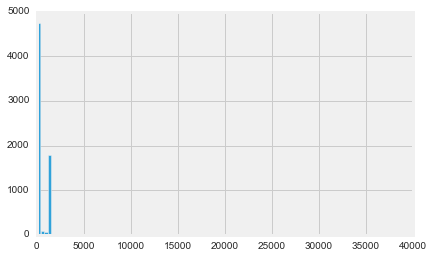

In [14]:
df[df['trip_duration'] > df.trip_duration.quantile(0.995)]['trip_duration'].hist(bins = 100)

In [141]:
# Removing trips longer than 300 minutes (5 hours)
# Who takes a taxi for more than 2 hours??!!

df = df[df['trip_duration'] < 300]

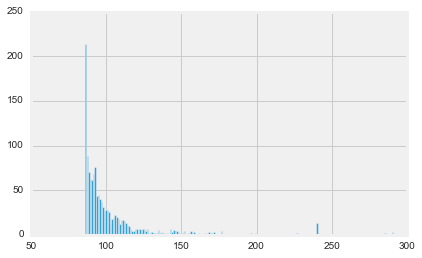

In [16]:
# Histogram for outliers trips (99.9th percentile)
df[df['trip_duration'] \
   > df.trip_duration.quantile(0.999)]['trip_duration'].hist(bins = 200)

### Comments:
There seems to be a spike near 250 minutes, which is quite strange.

In [18]:
# Inspecting trips which are longer than 230 minutes

df[df['trip_duration'] > 230]

,Unnamed: 0,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_month,day_of_week,pickup_hour,trip_duration
5136,5136,2015-07-02 11:18:27,2015-07-02 16:09:42,1,22.80,-73.988792,40.672970,1,-73.883804,40.860062,...,0.0,0.5,14.66,5.54,0.3,88.00,7,3,11,291.0
44643,44643,2015-07-13 17:35:48,2015-07-13 21:35:48,0,0.00,-73.951881,40.782990,99,0.000000,0.000000,...,0.0,0.0,0.00,0.00,0.0,35.84,7,0,17,240.0
60833,60833,2015-07-17 21:00:18,2015-07-18 01:17:56,1,0.80,-73.954666,40.789288,1,-73.952583,40.783600,...,0.5,0.5,0.00,0.00,0.3,6.80,7,4,21,257.0
111803,111803,2015-07-31 01:12:49,2015-07-31 05:12:49,0,0.00,-74.003937,40.741669,99,0.000000,0.000000,...,0.0,0.0,0.00,0.00,0.0,14.15,7,4,1,240.0
111811,111811,2015-07-31 01:16:38,2015-07-31 05:16:38,0,0.00,-73.987640,40.721222,99,0.000000,0.000000,...,0.0,0.0,0.00,0.00,0.0,7.55,7,4,1,240.0
111820,111820,2015-07-31 01:21:20,2015-07-31 05:21:20,0,0.00,-73.987083,40.729416,99,0.000000,0.000000,...,0.0,0.0,0.00,0.00,0.0,18.80,7,4,1,240.0
111944,111944,2015-07-31 02:41:17,2015-07-31 06:41:17,0,0.00,0.000000,0.000000,99,0.000000,0.000000,...,0.0,0.0,0.00,0.00,0.0,18.35,7,4,2,240.0
111945,111945,2015-07-31 02:41:32,2015-07-31 06:41:32,0,0.00,0.000000,0.000000,99,0.000000,0.000000,...,0.0,0.0,0.00,0.00,0.0,45.20,7,4,2,240.0
111979,111979,2015-07-31 03:13:23,2015-07-31 07:13:23,0,0.00,0.000000,0.000000,99,0.000000,0.000000,...,0.0,0.0,0.00,0.00,0.0,19.30,7,4,3,240.0
143317,27690,2015-08-22 19:14:27,2015-08-23 00:00:00,2,14.04,-73.874550,40.774120,1,-73.980759,40.654598,...,0.0,0.5,5.82,0.00,0.3,44.62,8,5,19,285.0


### Comments:
There is an uncanny number of trips with zero distance traveled but all having 240 minutes duration.

In [19]:
df[df['trip_duration'] == 240]

,Unnamed: 0,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_month,day_of_week,pickup_hour,trip_duration
44643,44643,2015-07-13 17:35:48,2015-07-13 21:35:48,0,0.0,-73.951881,40.782990,99,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,35.84,7,0,17,240.0
111803,111803,2015-07-31 01:12:49,2015-07-31 05:12:49,0,0.0,-74.003937,40.741669,99,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14.15,7,4,1,240.0
111811,111811,2015-07-31 01:16:38,2015-07-31 05:16:38,0,0.0,-73.987640,40.721222,99,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.55,7,4,1,240.0
111820,111820,2015-07-31 01:21:20,2015-07-31 05:21:20,0,0.0,-73.987083,40.729416,99,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,18.80,7,4,1,240.0
111944,111944,2015-07-31 02:41:17,2015-07-31 06:41:17,0,0.0,0.000000,0.000000,99,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,18.35,7,4,2,240.0
111945,111945,2015-07-31 02:41:32,2015-07-31 06:41:32,0,0.0,0.000000,0.000000,99,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,45.20,7,4,2,240.0
111979,111979,2015-07-31 03:13:23,2015-07-31 07:13:23,0,0.0,0.000000,0.000000,99,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,19.30,7,4,3,240.0
299850,72920,2015-09-20 08:25:17,2015-09-20 12:25:17,0,0.0,-73.949921,40.772015,99,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,18.30,9,6,8,240.0
299854,72924,2015-09-20 08:27:42,2015-09-20 12:27:42,0,0.0,-73.968132,40.761845,99,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.35,9,6,8,240.0
365422,26242,2015-10-09 20:37:43,2015-10-10 00:37:43,0,0.0,-73.980637,40.782097,99,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.80,10,4,20,240.0


In [28]:
zero_dist_df = df[df['trip_distance'] == 0]
zero_dist_df.shape

(1695, 22)

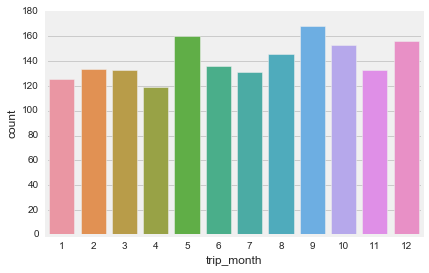

In [23]:
# Plotting trip month for zero distance trips
sns.countplot(x = 'trip_month', data = zero_dist_df)

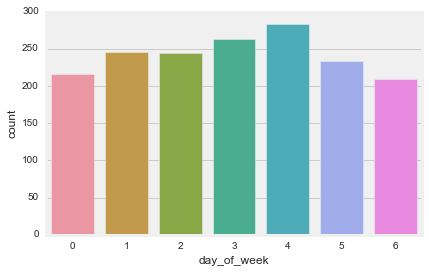

In [24]:
# Plotting day of week for zero distance trip
sns.countplot(x = 'day_of_week', data = zero_dist_df)

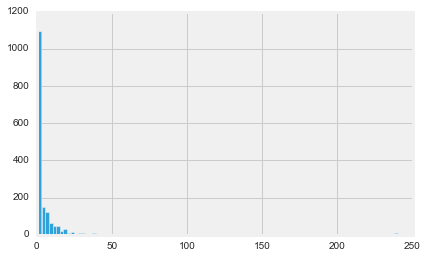

In [27]:
zero_dist_df['trip_duration'].hist(bins = 100)

### Comments:

It seemed that we should be able to drop zero duration and zero distances trips.

In [29]:
df.shape

(1370454, 22)

In [142]:
# Removing trips with zero trip distance and zero trip duration
df = df[df['trip_distance'] > 0]
df = df[df['trip_duration'] > 0]
df.shape

(1368759, 23)

## Investigating trip duration further

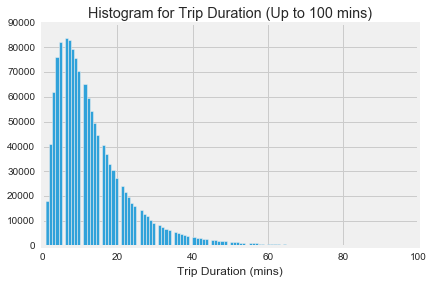

In [14]:
ax = df['trip_duration'].hist(bins = 350)

# Setting visual x-axis limit to 100 minutes for better representation
ax.set_xlim(0,100)
ax.set_xlabel('Trip Duration (mins)')
ax.set_title('Histogram for Trip Duration (Up to 100 mins)')

In [31]:
df['trip_duration'].describe()

count    1.368759e+06
mean     1.369539e+01
std      1.111440e+01
min      1.000000e+00
25%      6.000000e+00
50%      1.100000e+01
75%      1.800000e+01
max      2.910000e+02
Name: trip_duration, dtype: float64

### Comments:
Median trip duration of 11 minutes and mean of 13.7 minutes seems reasonable to me. Trips longer than 2 hours but shorter than 5 hours were included in the data set for possible trips to and from the airports or multiple stops trips.

## Passengers Count

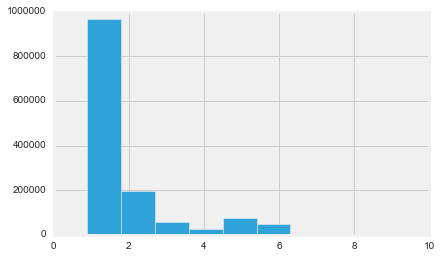

In [32]:
# This is a driver manual input field, hence it was only given a cursory glance.
df['passenger_count'].hist()

### Comments:
There was a disproportionate number single passenger trips, and this confirmed that this feature may be unreliable since it is a human-entry feature.

## Trip Distance

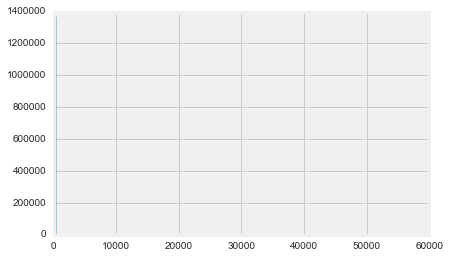

In [33]:
df['trip_distance'].hist(bins = 100)

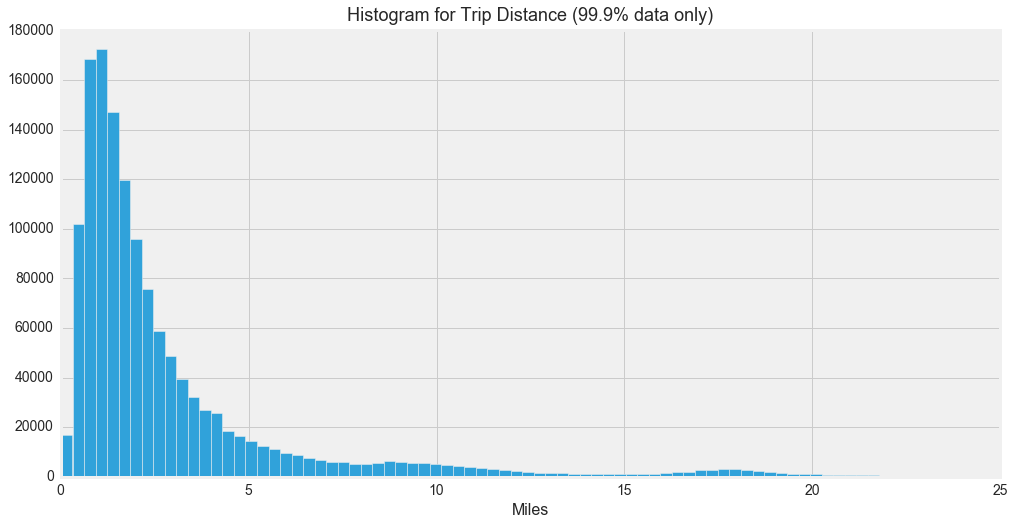

In [112]:
# Displaying 0-99th percentile of trip distance

ax = df[df.trip_distance < \
        df.trip_distance.quantile(.999)]['trip_distance'].hist(bins = 80, figsize = (15,8))
ax.set_title('Histogram for Trip Distance (99.9% data only)', y = 1.01, fontsize = 18)
ax.set_xlabel('Miles', fontsize = 16)
ax.tick_params(axis = 'both', labelsize = 14);

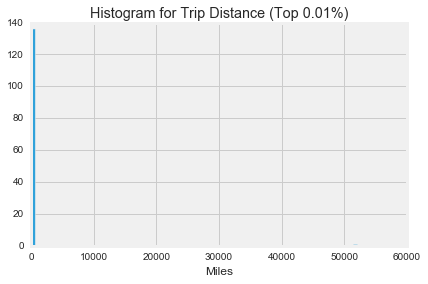

In [35]:
# Displaying top 0.01% of trip distance
ax = df[df.trip_distance > \
        df.trip_distance.quantile(.9999)]['trip_distance'].hist(bins = 80)
ax.set_title('Histogram for Trip Distance (Top 0.01%)')
ax.set_xlabel('Miles')

In [36]:
# Inspecting entries over 100 miles

df[df['trip_distance'] > 100]

,Unnamed: 0,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_month,day_of_week,pickup_hour,trip_duration
49401,49401,2015-07-14 22:09:53,2015-07-14 23:23:37,2,154.4,-74.000824,40.743080,1,-74.009483,40.720684,...,0.5,0.5,0.00,0.00,0.3,3.80,7,1,22,73.0
59191,59191,2015-07-17 11:28:06,2015-07-17 11:50:09,1,500.0,-73.874420,40.773975,1,-73.956047,40.778912,...,0.0,0.5,0.00,5.54,0.3,31.84,7,4,11,22.0
67454,67454,2015-07-19 13:53:05,2015-07-19 16:27:54,3,101.6,-74.008286,40.705376,5,-72.378242,40.957981,...,0.0,0.0,0.00,0.00,0.3,235.30,7,6,13,154.0
128238,12611,2015-08-18 11:21:08,2015-08-18 11:32:04,1,500.0,-73.953423,40.764942,1,-73.960861,40.773335,...,0.0,0.5,1.86,0.00,0.3,11.16,8,1,11,10.0
195507,79880,2015-08-07 22:05:09,2015-08-07 22:50:36,1,179.6,-73.785179,40.648483,2,-73.987595,40.759922,...,0.0,0.5,0.00,11.08,0.3,63.88,8,4,22,45.0
197359,81732,2015-08-08 11:16:15,2015-08-08 11:35:29,1,500.0,-73.976860,40.790520,1,-74.008286,40.739380,...,0.0,0.5,0.00,0.00,0.3,18.30,8,5,11,19.0
276025,49095,2015-09-13 22:58:32,2015-09-14 01:06:10,1,108.7,-73.789627,40.644627,5,-75.255013,40.076271,...,0.0,0.0,0.00,24.41,0.3,474.71,9,6,22,127.0
299593,72663,2015-09-20 04:10:47,2015-09-20 08:26:39,1,221.0,0.000000,0.000000,1,0.000000,0.000000,...,0.0,0.5,0.00,9.75,0.3,13.05,9,6,4,255.0
333069,106139,2015-09-29 12:25:04,2015-09-29 13:09:43,2,177.4,-73.788223,40.647472,1,-73.995590,40.720680,...,0.0,0.5,0.00,0.00,0.3,3.30,9,1,12,44.0
336646,109716,2015-09-30 11:33:54,2015-09-30 12:09:21,1,120.4,-74.002274,40.733498,1,-74.178085,40.689816,...,0.0,0.5,24.13,9.75,0.3,120.68,9,2,11,35.0


### Comments:

There was an extreme outlier with a taxi ride distance of over 52,000 miles (with 3 passengers, no less!). The [maximum straight-line distance](https://www.reference.com/geography/distance-across-united-states-f6665a323ae29d9a) in the United States is 2,802. This is about 9 times more, in a single trip!

Interim strategy to handle distance outliers:
- Keep these outliers first
- Remove trips over 1,000 miles long
- There will be another layer of cleaning when considering the pick-up and drop-off locations

In [143]:
# Removing trip_distance more than 1,000 miles long

df = df[df['trip_distance'] < 1000]
df.shape

(1368758, 23)

## Adding new feature: Average Speed

In [144]:
# In miles per hour

df['Avg_spd'] = df['trip_distance'] / (df['trip_duration'] /60)

In [54]:
df['Avg_spd'].describe()

count    1.368758e+06
mean     1.272740e+01
std      9.179918e+00
min      5.357143e-03
25%      8.100000e+00
50%      1.120000e+01
75%      1.542857e+01
max      3.333333e+03
Name: Avg_spd, dtype: float64

### Comments:
We should be expecting an average speed of between 10 to 15 mph, this should be the speed in the city. However, once there are significant portions of the trip spent on the freeway, this may increase to about 30-40 mph, but should be less than 60mph, given speed limit of freeway is 65mph.

In [145]:
# Removing entries with average speed of over 60mph

df= df[df['Avg_spd']< 60]

In [146]:
df.shape

(1368522, 24)

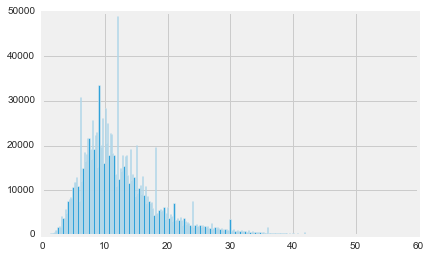

In [60]:
df['Avg_spd'].hist(bins = 300)

In [63]:
avg_spd = pd.pivot_table(df, values="Avg_spd", index = 'pickup_hour')

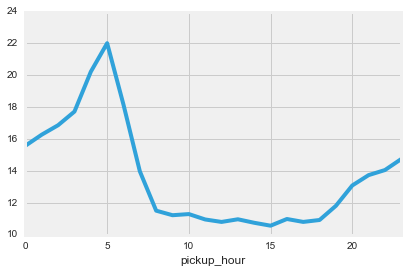

In [67]:
# Side - Best time to for the fastest taxi ride?
avg_spd.plot()

### Comments:

Need to account for trips going out of city, which would have a higher average speed. Since Manhattan is [13.4 miles long](https://en.wikipedia.org/wiki/Manhattan), it seems reasonable to only account for trips less than 10 miles.

In [68]:
spd_df = df[df['trip_distance'] < 10]

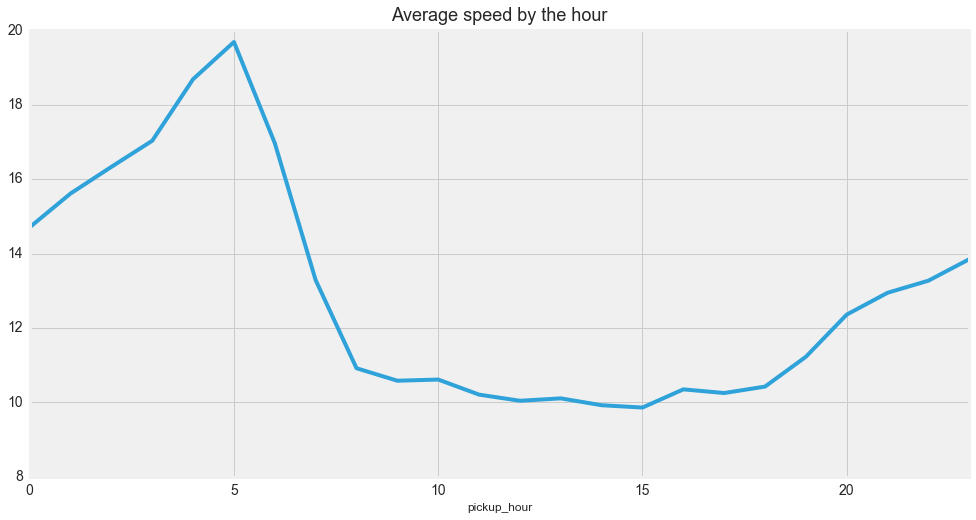

In [109]:
avg_10_spd = pd.pivot_table(spd_df, values="Avg_spd", index = 'pickup_hour')
ax = avg_10_spd.plot(figsize = (15,8))
ax.tick_params(axis = 'both', labelsize = 14)
ax.set_title('Average speed by the hour', y = 1.01, fontsize = 18)

In [70]:
avg_10_spd

pickup_hour
0     14.707959
1     15.615194
2     16.331950
3     17.034291
4     18.689123
5     19.688340
6     16.967721
7     13.286721
8     10.918341
9     10.582471
10    10.614167
11    10.208776
12    10.043784
13    10.108167
14     9.923970
15     9.861737
16    10.350492
17    10.252039
18    10.424824
19    11.226977
20    12.360551
21    12.947463
22    13.272650
23    13.850674
Name: Avg_spd, dtype: float64

### Comments:
Every additional hour in bed in the morning (5 to 8 am) results in a not-insignificant decrease in average taxi speed of about 3 mph.

## Payment Type Distribution

In [79]:
df[pd.isnull(df['total_amount'])]

,Unnamed: 0,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_month,day_of_week,pickup_hour,trip_duration,Avg_spd


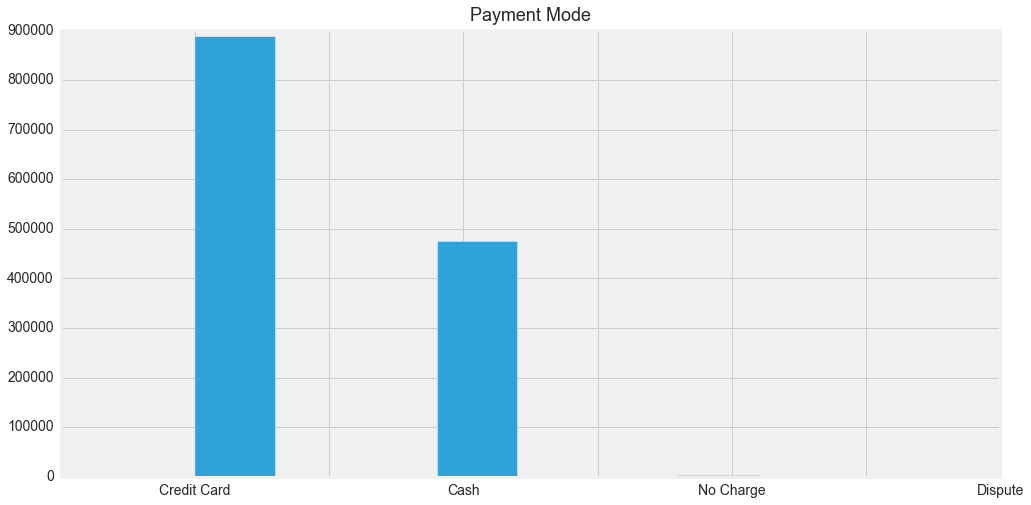

In [108]:
# 1= Credit card
# 2= Cash
# 3= No charge
# 4= Dispute
# 5= Unknown
# 6= Voided trip

ax = df['payment_type'].hist(figsize = (15,8))

ax.set_xticklabels(['', 'Credit Card', '', 'Cash', '', 'No Charge', \
                   '', 'Dispute'])
ax.tick_params(axis = 'both', labelsize = 14)
ax.set_title('Payment Mode', y = 1.01, fontsize = 18)

In [74]:
# Side - How much to tip?
# Tips column doesn't include cash tips, so restrict to only credit card payment

credit_pay = df[df['payment_type'] == 1]
credit_pay['tip_percent'] = 100*(credit_pay['tip_amount'] / \
(credit_pay['total_amount']- credit_pay['tip_amount']))
credit_pay.head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Unnamed: 0,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_month,day_of_week,pickup_hour,trip_duration,Avg_spd,tip_percent
0,0,2015-07-01 00:00:20,2015-07-01 00:07:57,1,2.10,-73.983780,40.755219,1,-73.987389,40.733372,...,1.96,0.0,0.3,11.76,7,2,0,7.0,18.000000,20.000000
1,1,2015-07-01 00:00:42,2015-07-01 00:08:27,2,1.18,-74.003471,40.725307,1,-74.004333,40.737984,...,2.08,0.0,0.3,10.38,7,2,0,7.0,10.114286,25.060241
2,2,2015-07-01 00:01:06,2015-07-01 00:12:06,1,3.10,-74.003044,40.717903,1,-73.958641,40.712761,...,2.40,0.0,0.3,15.70,7,2,0,11.0,16.909091,18.045113
3,3,2015-07-01 00:01:29,2015-07-01 00:07:52,2,2.10,-73.982910,40.726765,1,-73.967339,40.752625,...,1.85,0.0,0.3,11.15,7,2,0,6.0,21.000000,19.892473
5,5,2015-07-01 00:03:28,2015-07-01 00:06:54,1,0.46,-73.971519,40.762791,1,-73.973671,40.757149,...,1.16,0.0,0.3,6.96,7,2,0,3.0,9.200000,20.000000


In [77]:
credit_pay['tip_percent'].describe()

//anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    887461.000000
mean         18.884151
std         103.806131
min           0.000000
25%                NaN
50%                NaN
75%                NaN
max       83333.333333
Name: tip_percent, dtype: float64

In [81]:
credit_pay[pd.isnull(credit_pay['tip_percent'])]

,Unnamed: 0,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_month,day_of_week,pickup_hour,trip_duration,Avg_spd,tip_percent
272181,45251,2015-09-13 00:06:12,2015-09-13 00:33:00,1,2.0,-73.783524,40.648647,2,-73.956207,40.767506,...,0.0,0.0,0.0,0.0,9,6,0,26.0,4.615385,NaN
607327,31867,2015-12-08 18:40:32,2015-12-08 19:00:50,1,1.9,-73.968880,40.764256,1,-73.991760,40.751717,...,0.0,0.0,0.0,0.0,12,1,18,20.0,5.700000,NaN
775773,85708,2016-01-21 15:14:34,2016-01-21 15:58:36,1,16.3,-73.872726,40.774265,1,-74.008575,40.719666,...,0.0,0.0,0.0,0.0,1,3,15,44.0,22.227273,NaN
1063444,28382,2016-04-08 08:52:06,2016-04-08 09:02:38,1,3.4,-73.980774,40.713367,1,-74.013756,40.712627,...,0.0,0.0,0.0,0.0,4,4,8,10.0,20.400000,NaN
1067322,32260,2016-04-09 01:52:13,2016-04-09 02:01:19,1,1.2,-74.005203,40.719734,1,-73.988548,40.718529,...,0.0,0.0,0.0,0.0,4,5,1,9.0,8.000000,NaN


In [82]:
credit_pay.shape

(887466, 24)

In [85]:
credit_pay = credit_pay[credit_pay['tip_percent'].notnull()]
credit_pay.shape

(887461, 24)

In [88]:
credit_pay['tip_percent'].describe()

count    887461.000000
mean         18.884151
std         103.806131
min           0.000000
25%          15.873016
50%          19.973545
75%          20.000000
max       83333.333333
Name: tip_percent, dtype: float64

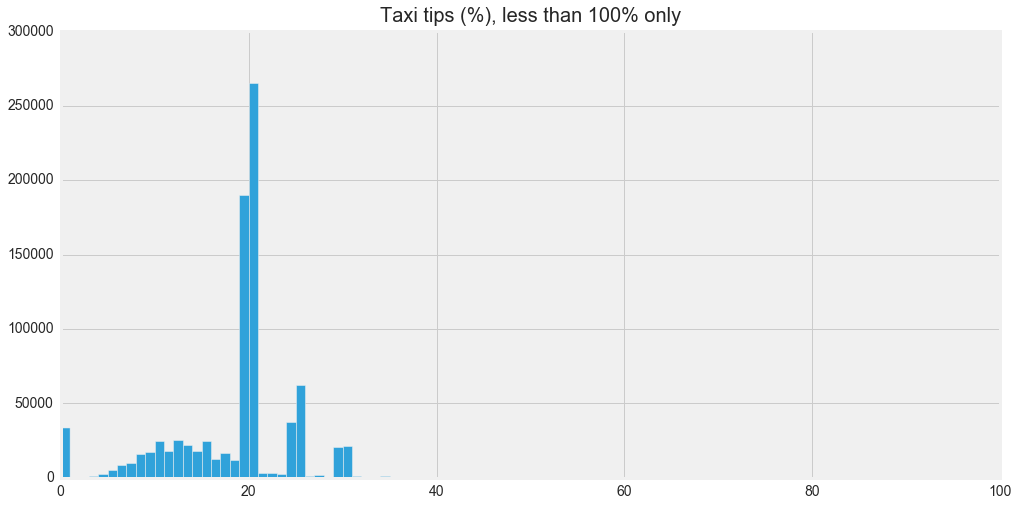

In [113]:
# Only restricting to tips of 100% or less
# As evident from above, the highest tip percent was 83,333%

ax = credit_pay[\
                credit_pay[\
                           'tip_percent'\
                          ] <=100\
               ]['tip_percent'].hist(\
                                     bins = 100, figsize = (15,8)\
                                    )
ax.tick_params(axis = 'both', labelsize = 14)
ax.set_title('Taxi tips (%), less than 100% only', y = 1.01, fontsize = 20)

## Monthly trips

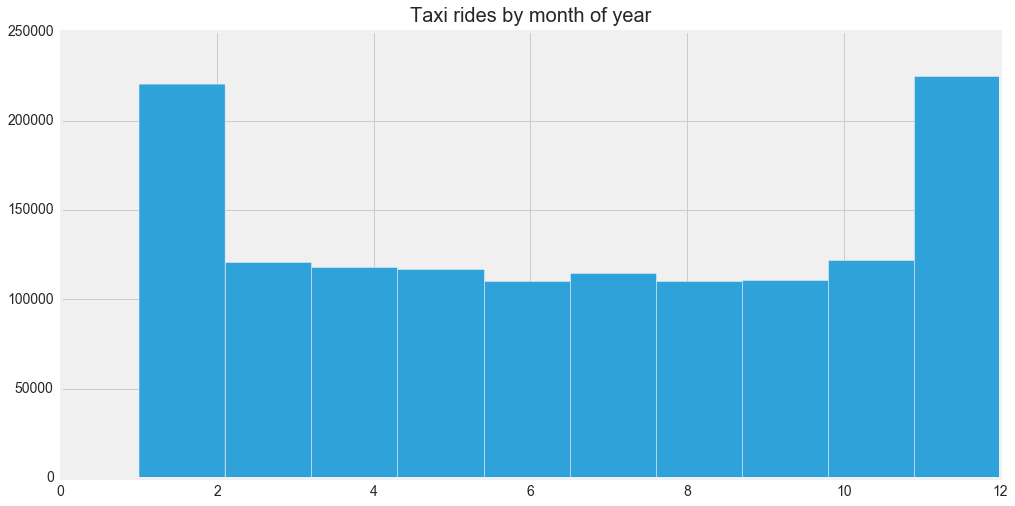

In [101]:
ax = df['trip_month'].hist(figsize = (15,8))
ax.tick_params(axis = 'both', labelsize = 14)
ax.set_title('Taxi rides by month of year', y = 1.01, fontsize = 20)

## Day of the week Trips

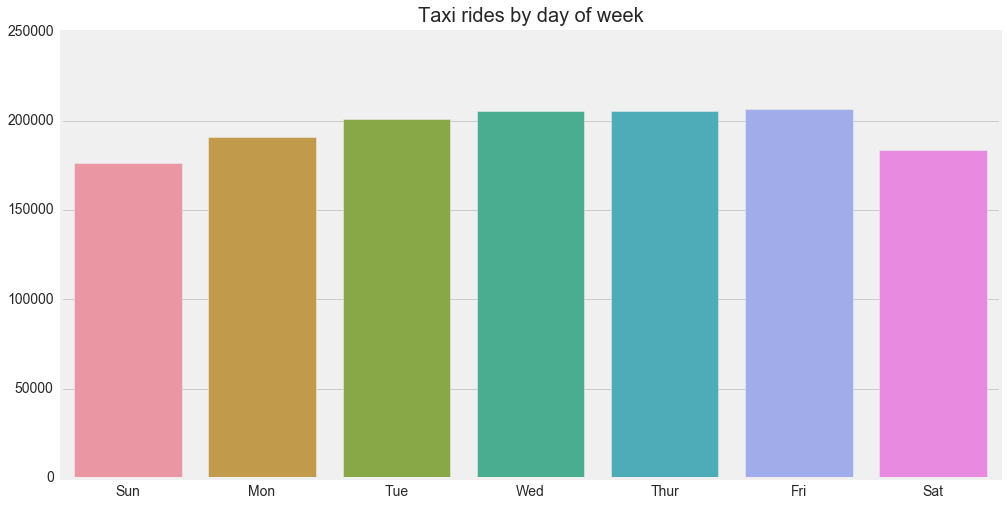

In [144]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
ax = sns.countplot(x = 'day_of_week', data = df)

ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat'])
ax.tick_params(axis = 'both', labelsize = 14)

ax.set_title('Taxi rides by day of week', y = 1.01, fontsize = 20)

## Hour of day drop-offs

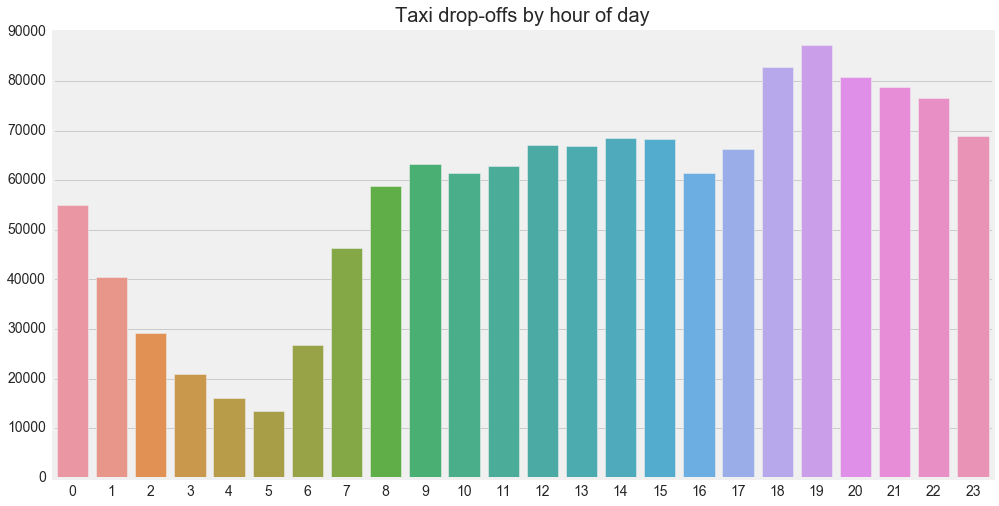

In [7]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15,8))
ax = sns.countplot(x = 'dropoff_hour', data = df)

ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
#ax.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat'])
ax.tick_params(axis = 'both', labelsize = 14)

ax.set_title('Taxi drop-offs by hour of day', y = 1.01, fontsize = 20)

In [147]:
# Overwriting new df to csv

df.to_csv('/Users/peidacai/Desktop/NYC_Taxi_mini_data/mini_yellow_taxi_data_1507_1606.csv')

# Adding in rental data

In [8]:
rent = pd.read_csv('../part-02/assets/data/cityfeet_retail_rental.csv')
rent.head()

,Unnamed: 0,Unnamed: 0.1,Full_Street_address,SF_avail,Price_per_sf_per_year,Prop_desc,Latitude,Longitude,City,Zipcode
0,0,0,"327 W 57th St, New York, NY 10019",3840,118.75,"(""Amazing Location! Perfect for Restaurant or ...",40.767498,-73.984111,New York,10019
1,1,1,"118 West 14th Street, New York, NY 10011",4200,140.00,('Prime retail at the base of a luxury residen...,40.737628,-73.997937,New York,10011
2,2,2,"778 Nostrand Ave, Brooklyn, NY 11215",1669,39.54,('Prime Retail Space located on the main strip...,40.672089,-73.950522,Brooklyn,11215
3,3,3,"5 Court Square, Long Island City, NY 11101",3500,35.00,"('Immediate possession, 2 5 year lease term...",40.746630,-73.942833,Long Island City,11101
4,4,4,"16 W 8th Street, New York, NY 10011",1163,149.61,('Excellent space steps from Washington Square...,40.732584,-73.997463,New York,10011


In [148]:
rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 9 columns):
Unnamed: 0               1128 non-null int64
Full_Street_address      1128 non-null object
SF_avail                 1128 non-null object
Price_per_sf_per_year    1128 non-null float64
Prop_desc                1020 non-null object
Latitude                 1120 non-null float64
Longitude                1120 non-null float64
City                     1128 non-null object
Zipcode                  1128 non-null int64
dtypes: float64(3), int64(2), object(4)
memory usage: 79.4+ KB


In [154]:
rent.describe()

,Unnamed: 0,SF_avail,Price_per_sf_per_year,Latitude,Longitude,Zipcode
count,1128.000000,1128.000000,1128.000000,1120.000000,1120.000000,1128.000000
mean,565.688830,5621.703901,50.333041,41.129772,-74.195285,11360.855496
std,326.438953,19229.961510,57.003063,0.760769,1.194306,1166.581604
min,0.000000,150.000000,0.020000,40.520447,-79.280088,10001.000000
25%,283.750000,1258.000000,18.500000,NaN,NaN,10523.000000
50%,565.500000,2400.000000,31.440000,NaN,NaN,11211.000000
75%,847.250000,5000.000000,60.000000,NaN,NaN,11743.000000
max,1132.000000,520000.000000,600.000000,44.670925,-72.185047,14850.000000


## SF Avail

In [54]:
# Some entries had a range of values for listing floor size
# These would be multiple units for rent in the same address.
# Based on experience, listing would show the lowest price on the website
# as click-bait
# Therefore, only the largest floor area were extracted

def clean_sf(x):
    if '-' in x:
        return int(x.split('-')[1])
    else:
        # Returning only the larger floor area of the range 
        # (see comments above)
        return int(x)
        

In [55]:
rent.loc[:,'SF_avail'] = rent['SF_avail'].apply(clean_sf)

In [56]:
# Overwriting csv file
rent.to_csv('../part-02/assets/data/cityfeet_retail_rental.csv')

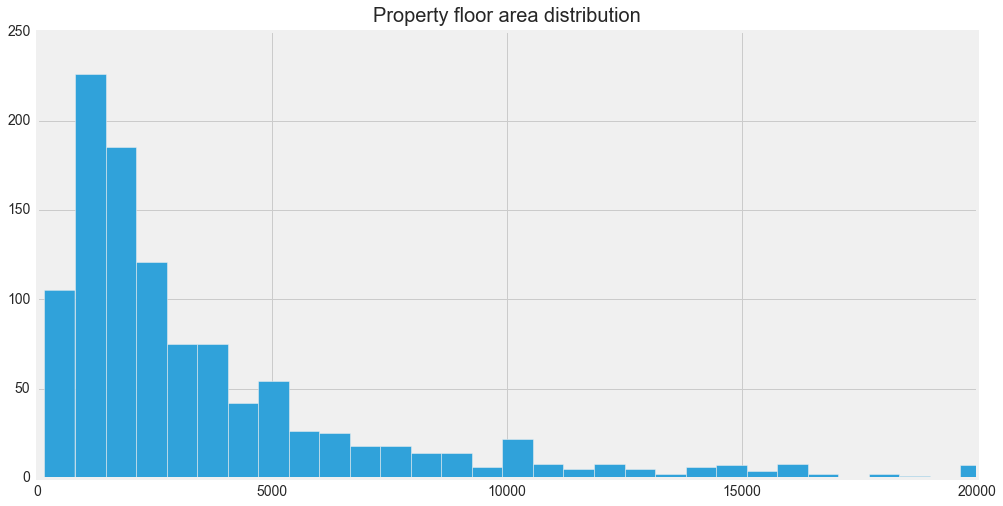

In [164]:
ax = rent['SF_avail'].hist(bins = 800, figsize = (15,8))
ax.set_xlim([0,20000])
ax.tick_params(axis = 'both', labelsize = 14)

ax.set_title('Property floor area distribution', y = 1.01, fontsize = 20);

## Price per square foot per year

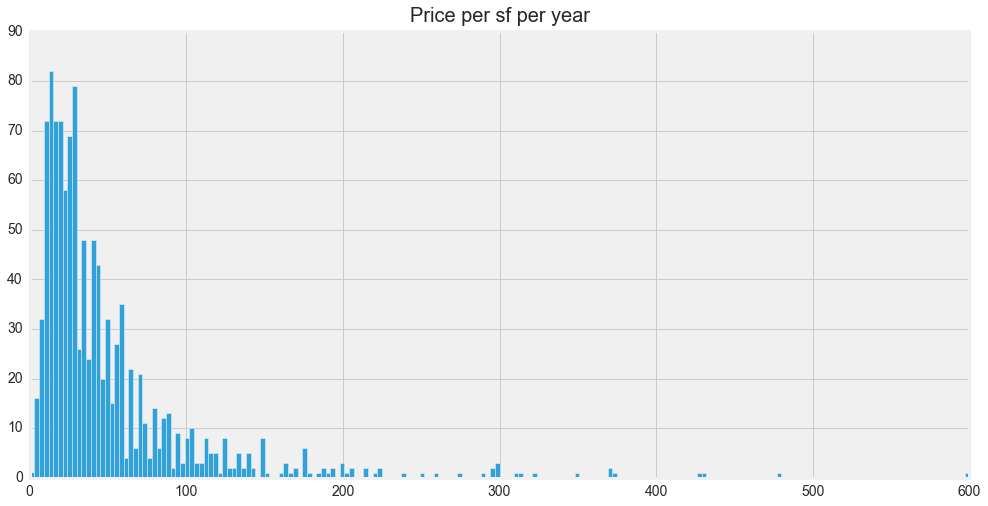

In [168]:
ax = rent['Price_per_sf_per_year'].hist(figsize = (15,8), bins = 200)
ax.tick_params(axis = 'both', labelsize = 14)
ax.set_title('Price per sf per year', y = 1.01, fontsize = 20);

### Comments:
Based on my experience in renting commercial properties previously, most high end, prime commercial retail rental property listings are not publicly available. These units are usually marketed by a specially appointed agent such as [Jones Lang Laselle](http://www.jllproperty.us/en-us/new-york-city/retail-properties-for-lease?k={%22f%22:%22%22,%22pst%22:%22%22,%22sm%22:%22%22,%22sr%22:%22%22,%22cm%22:%22%22,%22pr%22:%22%22,%22cmm%22:%22%22,%22ot%22:%22%22,%22mm%22:%220-nl%22,%22vt%22:%22b%22,%22cp%22:%221%22,%22po%22:%220%22,%22noi%22:%2212%22,%22s%22:%22%2Bjllbrokerlastname%22,%22ct%22:%22USD%22,%22gapi%22:%220%22}#vt=Browse), Cushman & Wakefield or Douglas Elli. Therefore, really high-end properties are not listed here (record retail rent went for \$3,500 per sf per year in 2015 - Upper 5th Avenue), as can be seen here, the most expensive unit is "only" going at \$600 per square foot per year.

In [171]:
# Filtering based on NYC geolocations

rent = rent[(rent['Latitude'] >= 40.492950)&\
            (rent['Latitude'] <= 40.906282)]
rent = rent[(rent['Latitude'] >= 40.492950)&\
            (rent['Latitude'] <= 40.906282)]

rent = rent[(rent['Longitude'] >= -74.045516)&\
            (rent['Longitude'] <= -73.903380)]
rent = rent[(rent['Longitude'] >= -74.045516)&\
            (rent['Longitude'] <= -73.903380)]

In [172]:
print rent.Price_per_sf_per_year.quantile(0.33)
print rent.Price_per_sf_per_year.quantile(0.66)

47.0182
85.0


In [173]:
rent['Price_per_sf_per_year'].describe()

count    462.000000
mean      83.571991
std       70.596475
min        3.340000
25%       40.102500
50%       60.000000
75%      100.000000
max      600.000000
Name: Price_per_sf_per_year, dtype: float64

In [59]:
rent['Price_tier'] = pd.cut(rent['Price_per_sf_per_year'], \
                            bins = [0,47,85,600], \
                            labels=['red', 'yellow', 'green'])
rent.head()

,Unnamed: 0,Unnamed: 0.1,Full_Street_address,SF_avail,Price_per_sf_per_year,Prop_desc,Latitude,Longitude,City,Zipcode,Price_tier
0,0,0,"327 W 57th St, New York, NY 10019",3840,118.75,"(""Amazing Location! Perfect for Restaurant or ...",40.767498,-73.984111,New York,10019,green
1,1,1,"118 West 14th Street, New York, NY 10011",4200,140.00,('Prime retail at the base of a luxury residen...,40.737628,-73.997937,New York,10011,green
2,2,2,"778 Nostrand Ave, Brooklyn, NY 11215",1669,39.54,('Prime Retail Space located on the main strip...,40.672089,-73.950522,Brooklyn,11215,red
3,3,3,"5 Court Square, Long Island City, NY 11101",3500,35.00,"('Immediate possession, 2 5 year lease term...",40.746630,-73.942833,Long Island City,11101,red
4,4,4,"16 W 8th Street, New York, NY 10011",1163,149.61,('Excellent space steps from Washington Square...,40.732584,-73.997463,New York,10011,green


In [175]:
rent.shape

(462, 10)

## Scatter plotting geo data

In [176]:
df.shape

(1368522, 23)

In [177]:
# Removing locations outside of NYC geographical boundaries
# Latitude  [40.492950, 40.906282]
# Longitude [-74.045516, -73.903380]

df = df[(df['pickup_latitude'] >= 40.492950)&\
        (df['pickup_latitude'] <= 40.906282)]
df = df[(df['dropoff_latitude'] >= 40.492950)&\
        (df['dropoff_latitude'] <= 40.906282)]

df = df[(df['pickup_longitude'] >= -74.045516)&\
        (df['pickup_longitude'] <= -73.903380)]
df = df[(df['dropoff_longitude'] >= -74.045516)&\
        (df['dropoff_longitude'] <= -73.903380)]

In [178]:
df.shape

(1237531, 23)

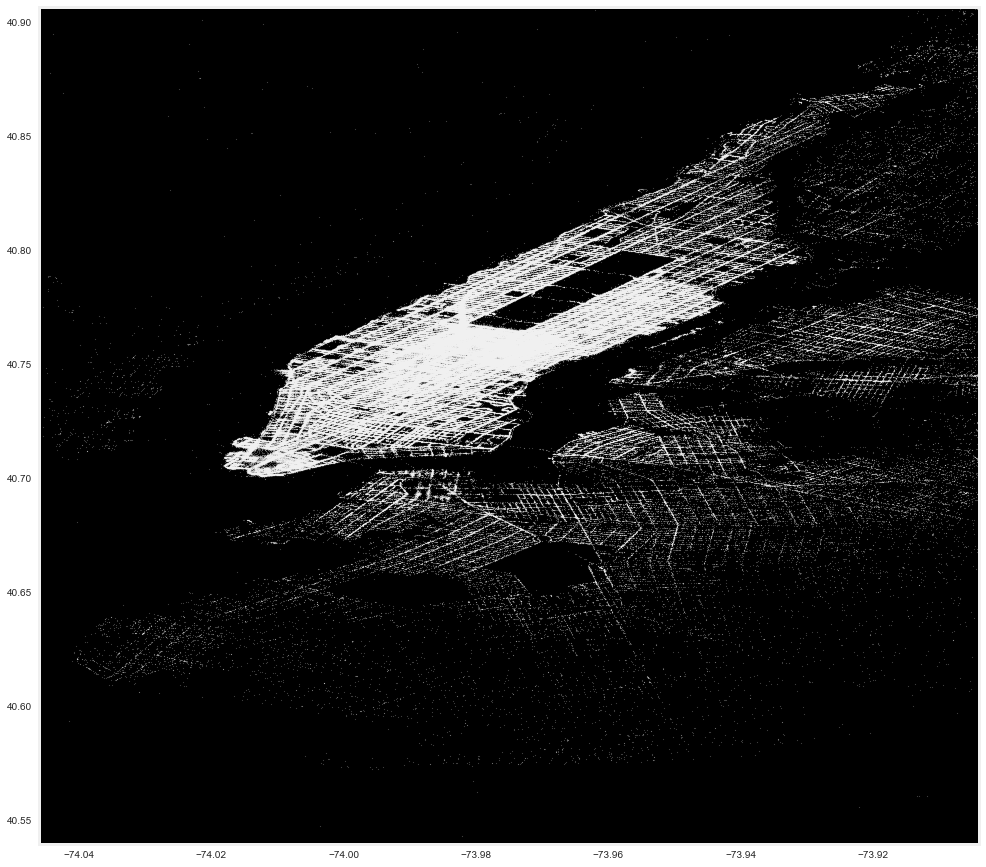

In [179]:
#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(15,15))

# Plotting taxi drop off location data
ax.scatter(df['dropoff_longitude'], df['dropoff_latitude'], \
           c='white', alpha = 0.2, s=0.5)

ax.grid(b = 'off', axis = 'both')
ax.set_axis_bgcolor('black')
ax.set_xlim(-74.046, -73.904)
ax.set_ylim(40.54, 40.907);


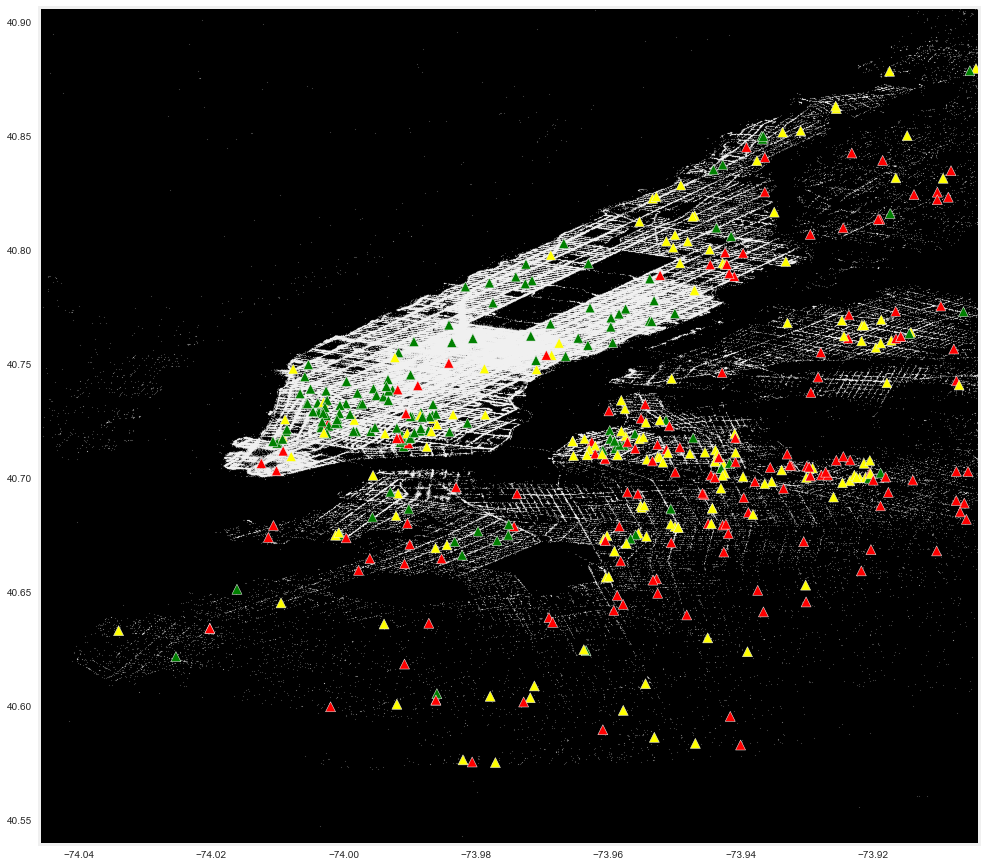

In [184]:
#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(15,15))

# Plotting taxi drop off location data
ax.scatter(df['dropoff_longitude'], df['dropoff_latitude'], \
           c='white', alpha = 0.2, s=0.5)

# Plotting rental locations
ax.scatter(rent['Longitude'], rent['Latitude'], c= rent['Price_tier'], \
           marker='^', s = 100)

ax.grid(b = 'off', axis = 'both')
ax.set_axis_bgcolor('black')
ax.set_xlim(-74.046, -73.904)
ax.set_ylim(40.54, 40.907);


### Include color spectrum for the rental prices for more information

In [61]:
from sklearn.preprocessing import MinMaxScaler

In [62]:
rent["price_spectrum"] = MinMaxScaler().fit_transform(
    rent['Price_per_sf_per_year'])
rent.head()

//anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


,Unnamed: 0,Unnamed: 0.1,Full_Street_address,SF_avail,Price_per_sf_per_year,Prop_desc,Latitude,Longitude,City,Zipcode,Price_tier,price_spectrum
0,0,0,"327 W 57th St, New York, NY 10019",3840,118.75,"(""Amazing Location! Perfect for Restaurant or ...",40.767498,-73.984111,New York,10019,green,0.197890
1,1,1,"118 West 14th Street, New York, NY 10011",4200,140.00,('Prime retail at the base of a luxury residen...,40.737628,-73.997937,New York,10011,green,0.233308
2,2,2,"778 Nostrand Ave, Brooklyn, NY 11215",1669,39.54,('Prime Retail Space located on the main strip...,40.672089,-73.950522,Brooklyn,11215,red,0.065869
3,3,3,"5 Court Square, Long Island City, NY 11101",3500,35.00,"('Immediate possession, 2 5 year lease term...",40.746630,-73.942833,Long Island City,11101,red,0.058302
4,4,4,"16 W 8th Street, New York, NY 10011",1163,149.61,('Excellent space steps from Washington Square...,40.732584,-73.997463,New York,10011,green,0.249325


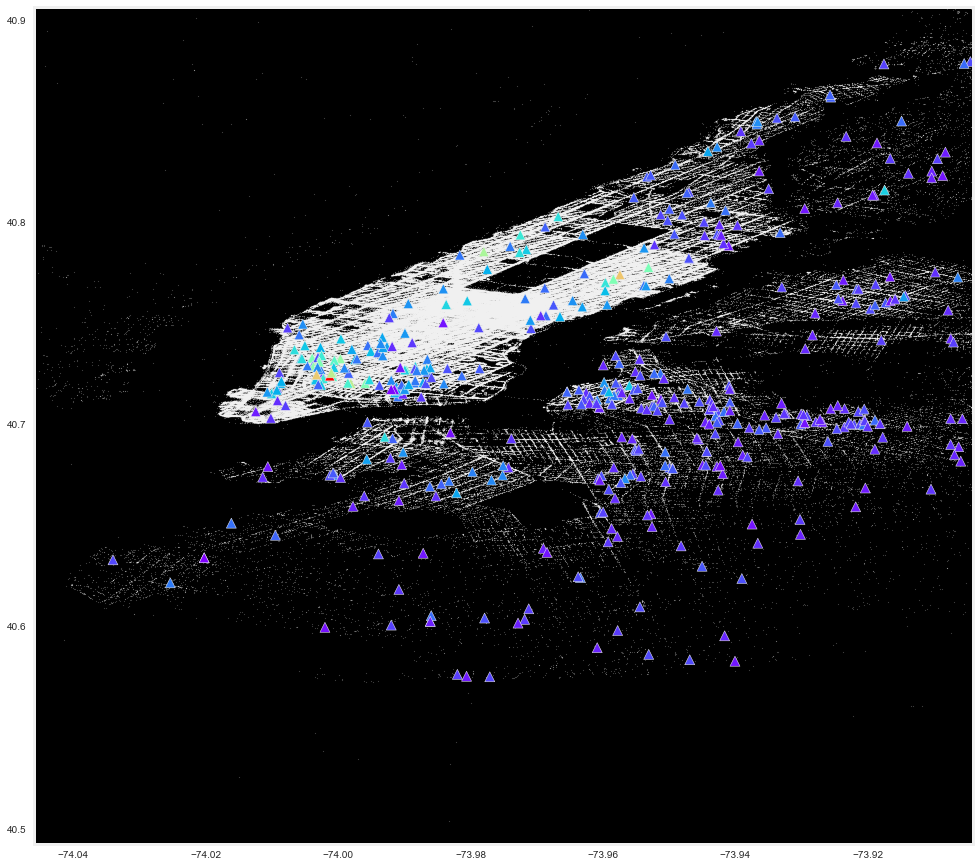

In [183]:
#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(15,15))

# Plotting taxi drop off location data
ax.scatter(df['dropoff_longitude'], df['dropoff_latitude'], c='white', \
           alpha = 0.2, s=0.5)

# Plotting rental locations
ax.scatter(rent['Longitude'], rent['Latitude'], c= rent['price_spectrum'], \
           cmap = 'rainbow', marker='^', s = 100)

ax.grid(b = 'off', axis = 'both')
ax.set_axis_bgcolor('black')
ax.set_xlim(-74.046, -73.904)
ax.set_ylim(40.493, 40.907);


### Including floor area in plot

In [64]:
rent['SF_scaled'] = MinMaxScaler().fit_transform(rent['SF_avail'])

//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)
//anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


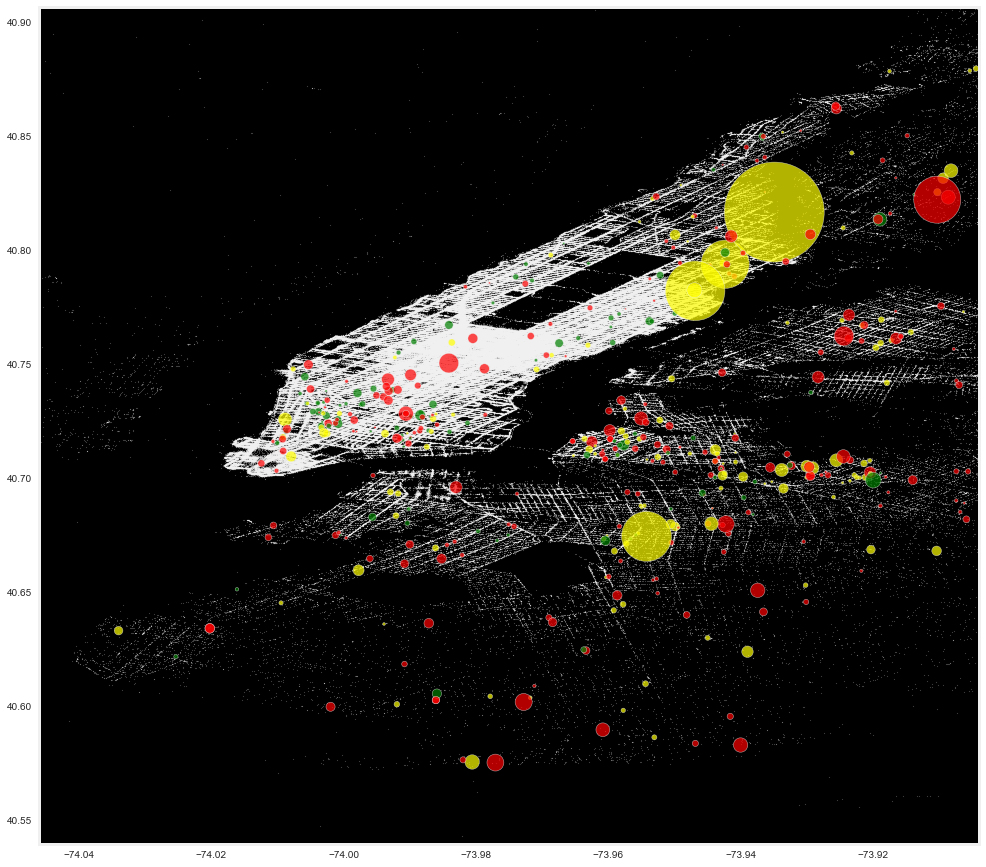

In [66]:
fig, ax = plt.subplots(figsize=(15,15))

# Plotting taxi drop off location data
ax.scatter(df['dropoff_longitude'], df['dropoff_latitude'], c='white', \
           alpha = 0.2, s=0.5)

# Plotting rental locations
ax.scatter(rent['Longitude'], rent['Latitude'], c= rent['Price_tier'], \
           marker='o', s = (rent['SF_scaled']*10000), \
           alpha = 0.7)

ax.grid(b = 'off', axis = 'both')
ax.set_axis_bgcolor('black')
ax.set_xlim(-74.046, -73.904)
ax.set_ylim(40.54, 40.907)
plt.savefig('taxi_dropoff_rental_locations.png');


# Geoplotting on Folium

## Data mining rent

In [21]:
# Position of Empire State Building (Taken as an arbitrary centre of NYC)
# 40.748660, -73.985741

import folium
from IPython.display import HTML

# Overlay on the map with NYC zipcodes
nyc_zipcode_geo = '/Users/peidacai/Desktop/nyc_zipcode_shapefiles.geojson'

#nyc_admin_geo = '/Users/peidacai/Downloads/new-york_new-york.imposm-geojson/new-york_new-york_admin.geojson'
#nyc_road_geo = '/Users/peidacai/Downloads/new-york_new-york.imposm-geojson/new-york_new-york_roads_gen0.geojson'

#manh_poly_geo = '/Users/peidacai/Downloads/manhattan_geojson/manhattan_osm_polygon.geojson'
#nyc_block_geo = '/Users/peidacai/Downloads/pluto.geojson'

In [22]:
rent.head(1)

,Unnamed: 0,Unnamed: 0.1,Full_Street_address,SF_avail,Price_per_sf_per_year,Prop_desc,Latitude,Longitude,City,Zipcode
0,0,0,"327 W 57th St, New York, NY 10019",3840,118.75,"(""Amazing Location! Perfect for Restaurant or ...",40.767498,-73.984111,New York,10019


In [23]:
# Creating a heatmap of the average rental prices of NYC

# But first, we need to get the average rental prices in the correct format

nyc_avg_rent = pd.pivot_table(rent, 'Price_per_sf_per_year', 'Zipcode')
nyc_avg_rent = pd.DataFrame(nyc_avg_rent)
nyc_avg_rent.reset_index(inplace = True)
nyc_avg_rent.columns = ['Zipcode', 'Avg_PSF']

nyc_avg_rent.head()

,Zipcode,Avg_PSF
0,10001,135.333333
1,10002,100.856667
2,10003,139.639091
3,10004,43.200000
4,10005,25.000000


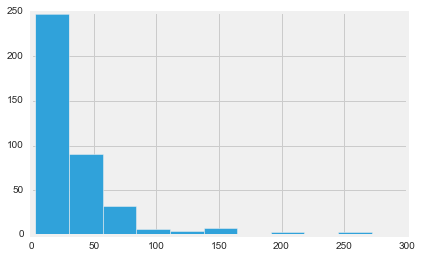

In [24]:
# Quick view of the distribution of rent
nyc_avg_rent['Avg_PSF'].hist()

In [25]:
nyc_avg_rent['Avg_PSF'].describe()

count    394.000000
mean      35.715954
std       37.561993
min        3.690000
25%       15.000000
50%       23.905556
75%       42.958333
max      271.810000
Name: Avg_PSF, dtype: float64

In [26]:
import geopandas as gpd

In [27]:
# Trying to view the geojson file with geopandas
# Should use json viewer instead

nyc_zip = gpd.read_file('/Users/peidacai/Desktop/nyc_zipcode_shapefiles.geojson')
nyc_zip.head()

,@id,BLDGpostal,CTY_FIPS,OBJECTID,PO_NAME,STATE,ST_FIPS,borough,geometry,latitude,longitude,postalCode
0,http://nyc.pediacities.com/Resource/PostalCode...,0,081,1,Jackson Heights,NY,36,Queens,POLYGON ((-73.86942457284177 40.74915687096788...,40.751662,-73.883573,11372
1,http://nyc.pediacities.com/Resource/PostalCode...,0,081,2,Glen Oaks,NY,36,Queens,POLYGON ((-73.71132911125308 40.74947450816085...,40.745366,-73.711608,11004
2,http://nyc.pediacities.com/Resource/PostalCode...,0,081,3,New Hyde Park,NY,36,Queens,POLYGON ((-73.70098278625547 40.73889569923034...,40.748714,-73.703443,11040
3,http://nyc.pediacities.com/Resource/PostalCode...,0,081,4,Bellerose,NY,36,Queens,POLYGON ((-73.72270447144122 40.75373371438336...,40.736534,-73.724004,11426
4,http://nyc.pediacities.com/Resource/PostalCode...,0,081,5,Fresh Meadows,NY,36,Queens,"POLYGON ((-73.81088634744756 40.7271718757592,...",40.739903,-73.794626,11365


In [28]:
# We need to add values for zipcodes which do not have any rental samples
# In this case, we will add 0

zip_list = []

# Loop to get zipcodes which are not in the rent df
# Give these zipcodes psf values of $0.00

for i in nyc_zip['postalCode']:
    if i not in nyc_avg_rent['Zipcode']:
        zip_list.append([i, 0])

# Convert to a dataframe
zip_list = pd.DataFrame(zip_list, columns=nyc_avg_rent.columns)
zip_list.head()

,Zipcode,Avg_PSF
0,11372,0
1,11004,0
2,11040,0
3,11426,0
4,11365,0


In [29]:
# Checking the number of rows in the original rent df
nyc_avg_rent.shape

(394, 2)

In [30]:
# Appending empty zipcodes to the original rent df
# Creating a new df in the process

df1 = pd.concat([nyc_avg_rent, zip_list], axis=0)
df1.head()

,Zipcode,Avg_PSF
0,10001,135.333333
1,10002,100.856667
2,10003,139.639091
3,10004,43.200000
4,10005,25.000000


In [31]:
# Checking the length of the new appended df
df1.shape

(656, 2)

## Plotting heatmap of retail rental prices into html

In [96]:
# Using folium to create the html file

# Initializing starting center position and zoom_state

m = folium.Map(location=[40.748660, -73.985741], zoom_start=12)

# Create a marker on the center position
# In this case, Empire State Building

folium.Marker([40.748660, -73.985741], \
              popup="Empire State Building").add_to(m)

# Add a geojson layer of the zipcode from geojson file containing NYC zipcode polygons
m.choropleth(geo_path = nyc_zipcode_geo, \
             
             # Inserting the price information for the respective zipcodes
             # From the new dataframe, df1
             data = df1, \
             columns = ['Zipcode', 'Avg_PSF'], \
             
             # Specifying the properties of the geojson file to color on
             # Need to inspect the geojson file to get the proper exact names
             # In this case, zipcodes are under
             # features -> properties -> postalCode
             key_on= 'features.properties.postalCode', \
             
             # Specifying the threshold for the color spectrum
             threshold_scale = [0,15,40,275],\
             fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.2, \
             
             # Including a legend
             legend_name='Average Price/sqft', reset = True)


#m.choropleth(geo_path = nyc_block_geo)
#m.choropleth(geo_path = nyc_road_geo)
#m.choropleth(geo_path = nyc_admin_geo)
#m.choropleth(geo_path = manh_poly_geo)

# Saving the html file instead of viewing inline (save memory)
m.save(outfile='map.html')

AttributeError: 'NoneType' object has no attribute 'get'

## Data mining taxi data

### Background
We need to convert the latitudes and longitudes of the drop-off positions to their respective zipcodes so that we can concatenate the taxi data with the rental data. 

### Assumptions
- In this case, we are only interested in the drop-off data, assuming that this is what is bringing the customers to the businesses.
- Secondly, specific types of businesses are interested in specific drop-off timings of their potential customers. Therefore, we are going to assume 2 broad categories of drop-off:
    - Typical operating hours: 1100hrs to 2130hrs
    - Nightlife operating hours: 1800hrs to 0300hrs

### Adding zipcode to drop-off locations

In [49]:
# Converting zipcodes in geojson string format to integers

nyc_zip.loc[:, 'postalCode'] = nyc_zip['postalCode'].astype(int)

In [50]:
# Creating a new df for polygons of zipcodes

zip_poly = nyc_zip[['postalCode', 'geometry']]
zip_poly.shape

(262, 2)

In [51]:
# Converting the polygon df to a dictionary to improve the speed of processing

zip_dict = {k:v for k,v in zip(nyc_zip['postalCode'], nyc_zip['geometry'])}

In [77]:
zip_dict

{83: <shapely.geometry.polygon.Polygon at 0x1196fa050>,
 10001: <shapely.geometry.polygon.Polygon at 0x11a0aee90>,
 10002: <shapely.geometry.polygon.Polygon at 0x11a6ea150>,
 10003: <shapely.geometry.polygon.Polygon at 0x11a0ae0d0>,
 10004: <shapely.geometry.polygon.Polygon at 0x11a6ea710>,
 10005: <shapely.geometry.polygon.Polygon at 0x11a6ea490>,
 10006: <shapely.geometry.polygon.Polygon at 0x11a6ea410>,
 10007: <shapely.geometry.polygon.Polygon at 0x11a6ea2d0>,
 10009: <shapely.geometry.polygon.Polygon at 0x11a6ea1d0>,
 10010: <shapely.geometry.polygon.Polygon at 0x11a0aefd0>,
 10011: <shapely.geometry.polygon.Polygon at 0x11a0aeed0>,
 10012: <shapely.geometry.polygon.Polygon at 0x11a6ea210>,
 10013: <shapely.geometry.polygon.Polygon at 0x11a6ea250>,
 10014: <shapely.geometry.polygon.Polygon at 0x11a0ae190>,
 10016: <shapely.geometry.polygon.Polygon at 0x11a0aef10>,
 10017: <shapely.geometry.polygon.Polygon at 0x11a0aee50>,
 10018: <shapely.geometry.polygon.Polygon at 0x11a0aed90>,


In [85]:
# Function to return the corresponding zipcodes of a specific longitude and latitude

def check_zip(x):
    
    try:
        
        # Converts the longitude and latitude pair to a Fiona "Point" object
        x = Point(x)

        for zipcode in zip_dict:
            
            # Use the method "contains" to check if a pair of longitude and latitude is within a zipcode polygon
            # "Contains" method returns True if x is in polygon
            if zip_dict[zipcode].contains(x):
                return zipcode
    except:
        
        # If zipcode not found and/or cannot convert to "Point" objects, return NaN
        return np.nan

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1368522 entries, 0 to 1384126
Data columns (total 25 columns):
Unnamed: 0               1368522 non-null int64
tpep_pickup_datetime     1368522 non-null datetime64[ns]
tpep_dropoff_datetime    1368522 non-null datetime64[ns]
passenger_count          1368522 non-null int64
trip_distance            1368522 non-null float64
pickup_longitude         1368522 non-null float64
pickup_latitude          1368522 non-null float64
RatecodeID               1368522 non-null int64
dropoff_longitude        1368522 non-null float64
dropoff_latitude         1368522 non-null float64
payment_type             1368522 non-null int64
fare_amount              1368522 non-null float64
extra                    1368522 non-null float64
mta_tax                  1368522 non-null float64
tip_amount               1368522 non-null float64
tolls_amount             1368522 non-null float64
improvement_surcharge    1368522 non-null float64
total_amount             136852

In [82]:
# Example code to check for a single pair of longitude and latitude

from shapely.geometry import Polygon, Point, MultiPolygon

a = Point([-73.883573, 40.751662])

b = nyc_zip.loc[0, 'geometry']
b.contains(a)

True

In [86]:
check_zip([-73.883573, 40.751662])

11372

In [54]:
# Creating a list of longitude and latitude of the dropoff positions
# Fiona takes position information in the "longitude, latitude" form

df['dropoff_point'] = df[['dropoff_longitude','dropoff_latitude']].values.tolist()

In [55]:
lonlat_list = df['dropoff_point'].tolist()

In [87]:
lonlatzip_list = []

for i in lonlat_list:
    lonlatzip_list.append(check_zip(i))

In [88]:
lonlatzip = pd.Series(lonlatzip_list)
lonlatzip.to_csv('lonlatzip.csv')

In [89]:
lonlatzip.head()

0    10003.0
1    10014.0
2    11211.0
3    10017.0
4    10014.0
dtype: float64

In [92]:
df['zipcode'] = lonlatzip
df.head()

,Unnamed: 0,Unnamed: 0.1,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,...,improvement_surcharge,total_amount,trip_month,day_of_week,pickup_hour,dropoff_hour,trip_duration,Avg_spd,dropoff_point,zipcode
0,0,0,2015-07-01 00:00:20,2015-07-01 00:07:57,1,2.10,-73.983780,40.755219,1,-73.987389,...,0.3,11.76,7,2,0,0,7.0,18.000000,"[-73.9873886108, 40.7333717346]",10003.0
1,1,1,2015-07-01 00:00:42,2015-07-01 00:08:27,2,1.18,-74.003471,40.725307,1,-74.004333,...,0.3,10.38,7,2,0,0,7.0,10.114286,"[-74.0043334961, 40.7379837036]",10014.0
2,2,2,2015-07-01 00:01:06,2015-07-01 00:12:06,1,3.10,-74.003044,40.717903,1,-73.958641,...,0.3,15.70,7,2,0,0,11.0,16.909091,"[-73.9586410522, 40.7127609253]",11211.0
3,3,3,2015-07-01 00:01:29,2015-07-01 00:07:52,2,2.10,-73.982910,40.726765,1,-73.967339,...,0.3,11.15,7,2,0,0,6.0,21.000000,"[-73.967338562, 40.7526245117]",10017.0
4,4,4,2015-07-01 00:01:53,2015-07-01 00:08:35,1,1.24,-74.002365,40.739746,1,-74.010254,...,0.3,8.30,7,2,0,0,6.0,12.400000,"[-74.0102539062, 40.7297973633]",10014.0


In [93]:
del df['Unnamed: 0']
del df['Unnamed: 0.1']

In [94]:
df.to_csv('/Users/peidacai/Desktop/NYC_Taxi_mini_data/mini_yellow_taxi_data_1507_1606.csv')

In [ ]:
# Drop off is more important as a proxy for retail sales


In [127]:
df.head(1)

NameError: name 'df' is not defined

## Using geopandas

In [26]:
admin = gpd.read_file('/Users/peidacai/Downloads/manhattan_geojson/manhattan_osm_polygon.geojson')

In [33]:
nyc_geo = gpd.read_file(nyc_admin_geo)

In [37]:
nyc_geo.head(20)

,admin_leve,geometry,id,name,osm_id,type
0,4.0,(POLYGON ((-74.04036104976406 40.7004759980712...,1.0,New York,-61320.0,administrative
1,8.0,POLYGON ((-74.24968902323877 40.41110696807877...,2.0,Matawan,-170383.0,administrative
2,8.0,POLYGON ((-74.18961206751872 40.44226895624016...,3.0,Union Beach,-170357.0,administrative
3,8.0,POLYGON ((-73.99204801132902 40.34944398864025...,4.0,Sea Bright,-170373.0,administrative
4,8.0,POLYGON ((-74.05846805609464 40.36368593177946...,5.0,Fair Haven,-170377.0,administrative
5,8.0,POLYGON ((-74.16137402246038 40.64428497648146...,6.0,Bayonne,-170504.0,administrative
6,8.0,POLYGON ((-74.25421600532376 40.67016896403354...,7.0,Elizabeth,-170505.0,administrative
7,8.0,POLYGON ((-74.33375900915493 40.64932593686905...,8.0,Garwood,-170506.0,administrative
8,8.0,POLYGON ((-74.28566607949722 40.66610994360272...,9.0,Roselle Park,-170507.0,administrative
9,8.0,POLYGON ((-74.31317456370334 40.67404877937449...,10.0,Kenilworth,-170508.0,administrative


In [38]:
g = nyc_geo.loc[0, 'geometry']

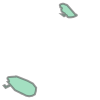

In [39]:
g

In [25]:
import geopandas_osm.osm

# Query for the highways within the `sg_boundary` we obtained earlier from the sg_admin.
# NB this does take on the order of minutes to run
ny_df = geopandas_osm.osm.query_osm('way', g, recurse='down', tags='highway')

# This gives us lots of columns we don't need, so we'll isolate it to the ones we do need
#df = df[df.type == 'LineString'][['highway', 'name', 'geometry']]

df.plot()

ImportError: No module named geopandas_osm.osm

# Things to do:

- Fix heatmap color of html map
    - Just need to run the folium cell with the new "features"

   
- Add list of zipcodes to taxi df
    - Drop NaN values, check count of rows
    - Pivot data based on zipcode and counts
    - Concatenate taxi-dropoff counts to the rental df

- May be better to use taxi count as heatmap then rental prices by markers instead of using rental prices as heatmap

- Can explore different information layers on the html file
    